<a href="https://colab.research.google.com/github/salvatorss/FakeNewsDetector/blob/main/fakenewsdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [3]:
df_fake= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Fake.csv")
df_true = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/True.csv")

df_fake['label'] = 1
df_true['label'] = 0

In [5]:
df_fake.head()


,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [6]:
df_true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [ ]:
df_fake.shape,df_true.shape

((23481, 5), (21417, 5))

In [7]:
df_true.info()
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
 4   label    21417 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 836.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
 4   label    23481 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 917.4+ KB


In [8]:
df_fake.isnull().sum()
df_true.isnull().sum()

,0
title,0
text,0
subject,0
date,0
label,0


In [9]:
df_fake.describe()
df_true.describe()

,label
count,21417.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [10]:
df_fake.duplicated().sum()


np.int64(3)

In [11]:
print("\n--- REAL (label=0) example ---")
print(df_true['text'].iloc[0][:500])  # first 500 chars

print("\n--- FAKE (label=1) example ---")
print(df_fake['text'].iloc[0][:500])


--- REAL (label=0) example ---
WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they retur

--- FAKE (label=1) example ---
Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Hea

In [12]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [13]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer =WordNetLemmatizer()

def preprocess_text(text):
   text = str(text)  # Ensure text is a string
   text = text.lower()
   text = re.sub(r'[^a-z\s]', ' ', text)
   tokens = text.split()
   tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
   return " ".join(tokens)

In [14]:
df_true['content'] = df_true['title'].fillna('') + ' ' + df_true['text'].fillna('')
df_fake['content'] = df_fake['title'].fillna('') + ' ' + df_fake['text'].fillna('')

In [15]:
df_merge =pd.concat([df_true,df_fake], axis=0 )
df=df_merge

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Apply preprocessing
df['clean_text'] = df['content'].apply(preprocess_text)


vectorizer =TfidfVectorizer(max_features=5000)

x=vectorizer.fit_transform(df['clean_text'])
y= df['label']

In [17]:
X_train,X_test,Y_train,Y_test =train_test_split(x,y,test_size=0.2,stratify=y)

In [19]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [18]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(X_train,Y_train)

MultinomialNB()

Accuracy: 0.9894209354120267
F1 score: 0.9898558462359851

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4284
           1       0.99      0.99      0.99      4696

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



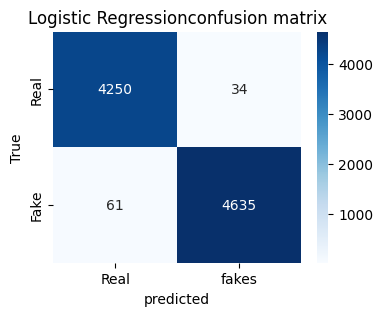

Accuracy: 0.9341870824053452
F1 score: 0.937214490598109

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      4284
           1       0.94      0.94      0.94      4696

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



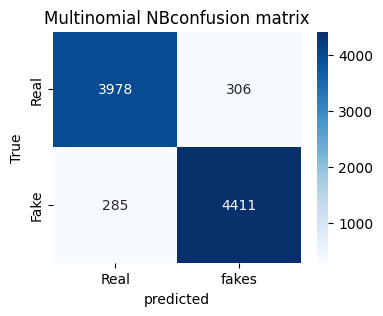

In [20]:
from sklearn.metrics import accuracy_score ,f1_score,classification_report,confusion_matrix

def evaluate(model,X_test,Y_test, name="Model"):
  y_pred =model.predict(X_test)
  print('Accuracy:', accuracy_score(Y_test,y_pred))
  print("F1 score:", f1_score(Y_test,y_pred))
  print("\nClassification report:\n", classification_report(Y_test, y_pred))

  cm = confusion_matrix(Y_test,y_pred)
  plt.figure(figsize=(4,3))
  sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', xticklabels=['Real','fakes'],yticklabels=["Real","Fake"])
  plt.xlabel("predicted")
  plt.ylabel("True")
  plt.title(f'{name}confusion matrix')
  plt.show()

evaluate(lr,X_test,Y_test,name="Logistic Regression")
evaluate(nb,X_test,Y_test,name='Multinomial NB')

In [21]:
import pickle
best_model =lr
pickle.dump(best_model,open("model.pkl", "wb"))
pickle.dump(vectorizer,open("vectorizer.pkl","wb"))

print("saved model and vectorizer to model.pkl and vectorizer.pkl")

saved model and vectorizer to model.pkl and vectorizer.pkl


In [22]:
%%writefile app.py
# Fake News Detection Streamlit App

import ssl
import nltk
import streamlit as st
import pickle
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Fix SSL certificate issues for NLTK downloads
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

# Download required NLTK data with error handling
try:
    nltk.download('stopwords', quiet=True)
    nltk.download('wordnet', quiet=True)
    nltk.download('omw-1.4', quiet=True)
    nltk.download('punkt', quiet=True)
except Exception as e:
    st.error(f"Error downloading NLTK data: {e}")

# Load the saved model and vectorizer
model = pickle.load(open("model.pkl", "rb"))
vectorizer = pickle.load(open("vectorizer.pkl", "rb"))

# Initialize NLTK components with error handling
try:
    stop_words = set(stopwords.words("english"))
    lemmatizer = WordNetLemmatizer()
except Exception as e:
    st.error(f"Error initializing NLTK components: {e}")
    st.stop()

# Preprocessing function (same as training)
def preprocess_text(text):
    try:
        text = str(text).lower()
        text = re.sub(r'[^a-z\s]', ' ', text)
        tokens = text.split()
        tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
        return " ".join(tokens)
    except Exception as e:
        st.error(f"Error in text preprocessing: {e}")
        return text

# Streamlit UI
st.title("📰 Fake News Detection")
st.write("Paste a news article below to check if it's Real or Fake.")

user_input = st.text_area("Paste your article here:", height=200)

if st.button("Predict"):
    if not user_input.strip():
        st.warning("Please paste some text first!")
    else:
        try:
            cleaned = preprocess_text(user_input)
            vect = vectorizer.transform([cleaned])
            pred = model.predict(vect)[0]
            prob = model.predict_proba(vect)[0] if hasattr(model, "predict_proba") else None

            if pred == 1:
                st.error("🚨 The model predicts: **FAKE NEWS**")
            else:
                st.success("✅ The model predicts: **REAL NEWS**")

            if prob is not None:
                st.write(f"Confidence → Real: {prob[0]:.2f}, Fake: {prob[1]:.2f}")

        except Exception as e:
            st.error(f"Error making prediction: {e}")
            st.write("Please try again or check your model files.")

Writing app.py


In [24]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 51.0 MB/s eta 0:00:00


In [23]:
!pip install pyngrok

In [25]:
import time, subprocess, threading
from pyngrok import ngrok
ngrok.set_auth_token("32KI2CG1lbQO8JYUlri1D9OioIY_3yMZMgevyedakurLb2TFs")
def run_st():
    subprocess.run(["streamlit", "run", "app.py", "--server.port=8501", "--server.headless=true"])

threading.Thread(target=run_st, daemon=True).start()
time.sleep(3)

public_url = ngrok.connect(8501)
print("Your Streamlit app is live here:", public_url)


Your Streamlit app is live here: NgrokTunnel: "https://3c20e6cd0d27.ngrok-free.app" -> "http://localhost:8501"


In [26]:
from pyngrok import ngrok
import time, subprocess, threading

ngrok.kill()
print("All local ngrok processes stopped.")

def run_st():
    subprocess.run(["streamlit", "run", "app.py", "--server.port=8501", "--server.headless=true"])

threading.Thread(target=run_st, daemon=True).start()
time.sleep(3)

try:
    public_url = ngrok.connect(8501)
    print("Your Streamlit app is live here:", public_url)
except Exception as e:
    print(f"Error: {e}")
    print("If you see auth error, you'll need to set up authtoken as shown in previous solution")


All local ngrok processes stopped.
Your Streamlit app is live here: NgrokTunnel: "https://2fb4ad19b5f4.ngrok-free.app" -> "http://localhost:8501"
